# Credit Card Clustering

## Customer Segmentation for Marketing Strategy
---

# Imports

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
from sklearn.preprocessing import Normalizer, StandardScaler

# Machine Learning
from sklearn.cluster import KMeans

# Cluster evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Cluster visualization
import plotly.express as px
from sklearn.manifold import TSNE

# Helper functions

In [2]:
# sets seaborn default style
sns.set()

# disable max columns limit
pd.set_option('display.max_columns', None)

# sets to not crop long vlaues for rows
pd.set_option("display.max_colwidth", None)

# sets format to suppress scientific notation
pd.options.display.float_format = '{:,.6f}'.format

# sets the global seed
SEED = 42


def get_clustering_scores(n_clusters, dataset):
    # instantiates the model and predicts the labels
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(dataset)
    
    # calculates the scores
    silhouette = silhouette_score(dataset, labels, metric='euclidean')
    davies_bouldin = davies_bouldin_score(dataset, labels)
    calinski_harabasz = calinski_harabasz_score(dataset, labels)
    
    return silhouette, davies_bouldin, calinski_harabasz


def calculate_clusters_stability(n_sets, n_clusters, dataset):
    sets = np.array_split(dataset, n_sets)

    # creates an accumulator for each metric
    s_scores = []
    db_scores = []
    calinski_scores = []
    
    # calculates the scores and store in their respective list
    for element in sets:
        s, dbs, calinski = get_clustering_scores(n_clusters, element)
            
        s_scores.append(s)
        db_scores.append(dbs)
        calinski_scores.append(calinski)
        
    print(f'Standard deviation for {n_clusters} clusters:\nSilouette: {np.std(s_scores)}\nDavies Bouldin: {np.std(db_scores)}\nCalinski Harabasz: {np.std(calinski_scores)}\n')

# 1.0 The context and understanding the business

Marketing is crucial for the growth and sustainability of any business. It can help build the company’s brand, engage customers, grow revenue, and increase sales.

One of the **key pain points** for a marketing team is to know their customers and identify their needs. By understanding the customer, the team can launch a targeted marketing campaign that is tailored for specific needs. In addition, if data about the customers is available, the data science team can help performing a **customer segmentation**.

## 1.1 What Is Customer Segmentation?

Customer segmentation is the process of dividing a target market into smaller, more defined categories. It segments customers and audiences into groups that share **similar characteristics** such as demographics, interests, needs, or location.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a **deeper understanding** of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to **more accurately** tailor marketing materials toward that segment.

## 1.2 Eight Benefits of Customer Segmentation

The importance of market segmentation is that it makes it easier to **focus marketing efforts and resources** on reaching the most valuable audiences and achieving **business goals**.

Market segmentation allows you to **get to know your customers**, identify what is needed in your market segment, and determine how you can best meet those needs with your product or service. This helps you design and execute **better marketing strategies** from top to bottom.

### 1. Create stronger marketing messages

When you know whom you’re talking to, you can develop stronger marketing messages. You can **avoid generic, vague language** that speaks to a broad audience. Instead, you can use direct messaging that speaks to the needs, wants, and **unique characteristics** of your target audience.

### 2. Identify the most effective marketing tactics

With dozens of marketing tactics available, it can be difficult to know what will attract your ideal audience. Using different types of market segmentation guides you toward the marketing strategies that will work best. When you know the audience you are targeting, **you can determine the best solutions and methods for reaching them**.

### 3. Design hyper-targeted ads

On digital ad services, you can target audiences by their age, location, purchasing habits, interests, and more. When you use market segmentation to define your audience, you know these detailed characteristics and can use them to create **more effective, targeted digital ad campaigns**.

### 4. Attract (and convert) quality leads

When your marketing messages are clear, direct, and targeted they attract the right people. You draw in ideal prospects and are more likely to **convert** potential customers into buyers.

### 5. Differentiate your brand from competitors

Being more specific about your value propositions and messaging also allows you to **stand out from competitors**. Instead of blending in with other brands, you can differentiate your brand by focusing on specific customer needs and characteristics.

### 6. Build deeper customer affinity

When you know what your customers want and need, you can deliver and communicate offerings that uniquely serve and resonate with them . This distinct value and messaging leads to **stronger bonds** between brands and customers and creates lasting brand affinity.

### 7. Identify niche market opportunities

Niche marketing is the process of identifying segments of industries and verticals that have a large audience that can be served in new ways. When you segment your target market, you can find underserved niche markets that you can develop **new products and services** for.

### 8. Stay focused

Targeting in marketing keeps your messaging and marketing objectives on track. It helps you identify new marketing opportunities and **avoid distractions** that will lead you away from your target market.

## 1.3 The Four Types of Customer Segmentation

The four bases of market segmentation are:

- Demographic segmentation
- Psychographic segmentation
- Behavioral segmentation
- Geographic segmentation

In this project, we focused in the **behavioral segmentation** which focuses on how the customer acts.

**Behavioral Customer Segmentation Examples** 

- Purchasing habits
- Spending habits
- User status
- Brand interactions

Behavioral segmentation requires you to know about your customer’s actions. These activities may relate to how a customer interacts with your brand or to other activities that happen away from your brand.

![](img/cust_ex-customer_segmentation.png)

## References
- https://blog.alexa.com/types-of-market-segmentation/
- https://searchcustomerexperience.techtarget.com/definition/customer-segmentation

# 2.0 Checking the data set

According to the kaggle page (https://www.kaggle.com/arjunbhasin2013/ccdata):

"The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables."

## 2.1 Data Dictionary

| Variable                       | Description                                                                                                                   |
|:--------------------------------|:-------------------------------------------------------------------------------------------------------------------------------|
| CUSTID                         | Identification of Credit Card holder \(Categorical\)                                                                          |
| BALANCE                        | Balance amount left in their account to make purchases                                                                        |
| BALANCE_FREQUENCY               | How frequently the Balance is updated, score between 0 and 1 \(1 = frequently updated, 0 = not frequently updated\)           |
| PURCHASES                      | Amount of purchases made from account                                                                                         |
| ONEOFF_PURCHASES                | Maximum purchase amount done in one\-go                                                                                       |
| INSTALLMENTS_PURCHASES          | Amount of purchase done in installment                                                                                        |
| CASH_ADVANCE                    | Cash in advance given by the user                                                                                             |
| PURCHASES_FREQUENCY             | How frequently the Purchases are being made, score between 0 and 1 \(1 = frequently purchased, 0 = not frequently purchased\) |
| ONEOFF_PURCHASES_FREQUENCY       | How frequently Purchases are happening in one\-go \(1 = frequently purchased, 0 = not frequently purchased\)                  |
| PURCHASES_INSTALLMENTS_FREQUENCY | How frequently purchases in installments are being done \(1 = frequently done, 0 = not frequently done\)                      |
| CASH_ADVANCE_FREQUENCY           | How frequently the cash in advance being paid                                                                                 |
| CASHADVANCE_TRX                 | Number of Transactions made with "Cash in Advanced"                                                                           |
| PURCHASES_TRX                   | Number of purchase transactions made                                                                                           |
| CREDIT_LIMIT                    | Limit of Credit Card for user                                                                                                 |
| PAYMENTS                       | Amount of Payment done by user                                                                                                |
| MINIMUM\_PAYMENTS              | Minimum amount of payments made by user                                                                                       |
| PRCFULL_PAYMENT                 | Percent of full payment paid by user                                                                                          |
| TENURE                         | Tenure of credit card service for user in years                                                                                        |


## 2.2 Loading the data set

In [3]:
# loads data set
df_cc_raw = pd.read_csv('data/CC_GENERAL.csv')

df_cc_raw.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182    95.400000          0.000000   
1  C10002 3,202.467416           0.909091     0.000000          0.000000   
2  C10003 2,495.148862           1.000000   773.170000        773.170000   
3  C10004 1,666.670542           0.636364 1,499.000000      1,499.000000   
4  C10005   817.714335           1.000000    16.000000         16.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               95.400000      0.000000             0.166667   
1                0.000000  6,442.945483             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000    205.788017             0.083333   
4                0.000000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2  1,000.000000   
1                0.250000                 4              0  7,000.000000   
2                0.000000                 0             12  7,500.000000   
3                0.083333                 1              1  7,500.000000   
4                0.000000                 0              1  1,200.000000   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1 4,103.032597      1,072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               nan          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
# checks data set info
df_cc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 2.3 Dropping unuseful columns

As in this project the the `CUST_ID` won't add any value for our analysis, we'll drop it.

In [5]:
# drops the column
df_cc = df_cc_raw.drop('CUST_ID', axis=1)
df_cc.sample()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
1494 167.505508           0.818182 1,219.000000        843.000000   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1494              376.000000      0.000000             0.750000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1494                    0.750000                          0.416667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1494                0.000000                 0             21  4,500.000000   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1494 1,989.674433        161.279514          0.666667      12

## 2.4 Renaming columns

In [6]:
# creates an empty list
new_cols_names = [] 

# stores the new cols names
for col in df_cc.columns:
    new_cols_names.append(col.lower())

In [7]:
# renames data set cols
df_cc.columns = new_cols_names

df_cc.sample()

balance  balance_frequency    purchases  oneoff_purchases  \
917 515.135703           1.000000 2,457.480000      1,272.500000   

     installments_purchases  cash_advance  purchases_frequency  \
917            1,184.980000      0.000000             1.000000   

     oneoff_purchases_frequency  purchases_installments_frequency  \
917                    0.583333                          1.000000   

     cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
917                0.000000                 0             69  7,000.000000   

        payments  minimum_payments  prc_full_payment  tenure  
917 2,858.180367        177.692271          0.250000      12

## 2.3 Descriptive statistics

In [8]:
# central tendency: mean, median
mean = pd.DataFrame(df_cc.apply(np.mean)).T
median = pd.DataFrame(df_cc.apply(np.median)).T

# distribution: std, min, max, range, skew, kurtosis
std = pd.DataFrame(df_cc.apply(np.std)).T
min_value = pd.DataFrame(df_cc.apply(min)).T
max_value = pd.DataFrame(df_cc.apply(max)).T
range_value = pd.DataFrame(df_cc.apply(lambda x: x.max() - x.min())).T
skewness = pd.DataFrame(df_cc.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(df_cc.apply(lambda x: x.kurtosis())).T

# concatenates
summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
summary_stats.columns = ['attributes','min','max','range','mean','median','std','skewness','kurtosis']

In [9]:
# checks the operations
summary_stats

attributes       min           max         range  \
0                            balance  0.000000 19,043.138560 19,043.138560   
1                  balance_frequency  0.000000      1.000000      1.000000   
2                          purchases  0.000000 49,039.570000 49,039.570000   
3                   oneoff_purchases  0.000000 40,761.250000 40,761.250000   
4             installments_purchases  0.000000 22,500.000000 22,500.000000   
5                       cash_advance  0.000000 47,137.211760 47,137.211760   
6                purchases_frequency  0.000000      1.000000      1.000000   
7         oneoff_purchases_frequency  0.000000      1.000000      1.000000   
8   purchases_installments_frequency  0.000000      1.000000      1.000000   
9             cash_advance_frequency  0.000000      1.500000      1.500000   
10                  cash_advance_trx  0.000000    123.000000    123.000000   
11                     purchases_trx  0.000000    358.000000    358.000000   
12                      credit_limit 50.000000 30,000.000000 29,950.000000   
13                          payments  0.000000 50,721.483360 50,721.483360   
14                  minimum_payments  0.019163 76,406.207520 76,406.188357   
15                  prc_full_payment  0.000000      1.000000      1.000000   
16                            tenure  6.000000     12.000000      6.000000   

           mean     median          std  skewness   kurtosis  
0  1,564.474828 873.385231 2,081.415590  2.393386   7.674751  
1      0.877271   1.000000     0.236891 -2.023266   3.092370  
2  1,003.204834 361.280000 2,136.515413  8.144269 111.388771  
3    592.437371  38.000000 1,659.795184 10.045083 164.187572  
4    411.067645  89.000000   904.287592  7.299120  96.575178  
5    978.871112   0.000000 2,097.046713  5.166609  52.899434  
6      0.490351   0.500000     0.401348  0.060164  -1.638631  
7      0.202458   0.083333     0.298319  1.535613   1.161846  
8      0.364437   0.166667     0.397426  0.509201  -1.398632  
9      0.135144   0.000000     0.200110  1.828686   3.334734  
10     3.248827   0.000000     6.824265  5.721298  61.646862  
11    14.709832   7.000000    24.856260  4.630655  34.793100  
12 4,494.449450        nan 3,638.612411  1.522464   2.836656  
13 1,733.143852 856.901546 2,894.902017  5.907620  54.770736  
14   864.206542        nan 2,372.309261 13.622797 283.989986  
15     0.153715   0.000000     0.292483  1.942820   2.432395  
16    11.517318  12.000000     1.338256 -2.943017   7.694823

## 2.4 Checking missing data

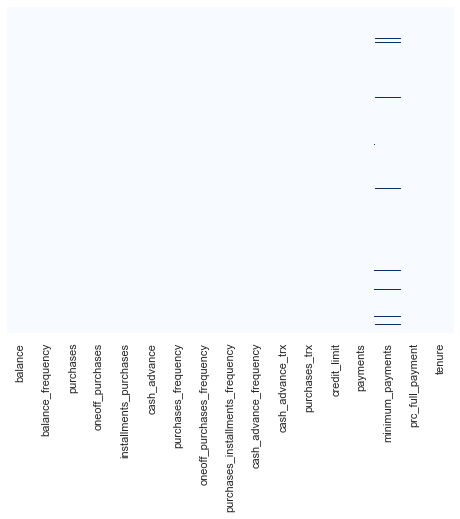

In [10]:
# sets plot size
plt.figure(figsize=(8,6))

# let's see if we have any missing data
sns.heatmap(df_cc.isnull(), yticklabels=False, cbar=False, cmap='Blues')

# displays the plot
plt.show()

In [11]:
# checks how many missin data we have
df_cc.isna().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

As we've seen in the summary statistics, it's reasonable to fill the missing values with their respective average values.

In [12]:
# Fill up the missing elements with mean of the 'minimum_payments' 
df_cc.loc[(df_cc['minimum_payments'].isnull() == True), 'minimum_payments'] = df_cc['minimum_payments'].mean()

# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
df_cc.loc[(df_cc['credit_limit'].isnull() == True), 'credit_limit'] = df_cc['credit_limit'].mean()

In [13]:
# checks how many missin data we have
df_cc.isna().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

## 2.5 Checking outliers

### 2.5.1 Re-calculating the descriptive statistics

In [14]:
# central tendency: mean, median
mean = pd.DataFrame(df_cc.apply(np.mean)).T
median = pd.DataFrame(df_cc.apply(np.median)).T

# distribution: std, min, max, range, skew, kurtosis
std = pd.DataFrame(df_cc.apply(np.std)).T
min_value = pd.DataFrame(df_cc.apply(min)).T
max_value = pd.DataFrame(df_cc.apply(max)).T
range_value = pd.DataFrame(df_cc.apply(lambda x: x.max() - x.min())).T
skewness = pd.DataFrame(df_cc.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(df_cc.apply(lambda x: x.kurtosis())).T

# concatenates
summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
summary_stats.columns = ['attributes','min','max','range','mean','median','std','skewness','kurtosis']

### 2.5.2 By skewness and kurtosis

In [15]:
# classifies skwewness
summary_stats['skwewness_class'] = summary_stats['skewness'].apply(lambda x: 
                                                                   'nearly symetric' if (((x > 0) & (x < 0.5)) | ((x < 0) & (x > -0.5))) 
                                                                   else 'moderately skewed' if (((x > 0.5) & (x < 1.)) | ((x < -0.5) & (x > -1.0))) 
                                                                   else 'highly skewed')

# classifies kurtosis
summary_stats['kurtosis_class'] = summary_stats['kurtosis'].apply(lambda x:
                                                                 'heavy tails' if (x > 0) 
                                                                 else 'light tails')

In [16]:
# checks operations
summary_stats

attributes       min           max         range  \
0                            balance  0.000000 19,043.138560 19,043.138560   
1                  balance_frequency  0.000000      1.000000      1.000000   
2                          purchases  0.000000 49,039.570000 49,039.570000   
3                   oneoff_purchases  0.000000 40,761.250000 40,761.250000   
4             installments_purchases  0.000000 22,500.000000 22,500.000000   
5                       cash_advance  0.000000 47,137.211760 47,137.211760   
6                purchases_frequency  0.000000      1.000000      1.000000   
7         oneoff_purchases_frequency  0.000000      1.000000      1.000000   
8   purchases_installments_frequency  0.000000      1.000000      1.000000   
9             cash_advance_frequency  0.000000      1.500000      1.500000   
10                  cash_advance_trx  0.000000    123.000000    123.000000   
11                     purchases_trx  0.000000    358.000000    358.000000   
12                      credit_limit 50.000000 30,000.000000 29,950.000000   
13                          payments  0.000000 50,721.483360 50,721.483360   
14                  minimum_payments  0.019163 76,406.207520 76,406.188357   
15                  prc_full_payment  0.000000      1.000000      1.000000   
16                            tenure  6.000000     12.000000      6.000000   

           mean       median          std  skewness   kurtosis  \
0  1,564.474828   873.385231 2,081.415590  2.393386   7.674751   
1      0.877271     1.000000     0.236891 -2.023266   3.092370   
2  1,003.204834   361.280000 2,136.515413  8.144269 111.388771   
3    592.437371    38.000000 1,659.795184 10.045083 164.187572   
4    411.067645    89.000000   904.287592  7.299120  96.575178   
5    978.871112     0.000000 2,097.046713  5.166609  52.899434   
6      0.490351     0.500000     0.401348  0.060164  -1.638631   
7      0.202458     0.083333     0.298319  1.535613   1.161846   
8      0.364437     0.166667     0.397426  0.509201  -1.398632   
9      0.135144     0.000000     0.200110  1.828686   3.334734   
10     3.248827     0.000000     6.824265  5.721298  61.646862   
11    14.709832     7.000000    24.856260  4.630655  34.793100   
12 4,494.449450 3,000.000000 3,638.409131  1.522549   2.837308   
13 1,733.143852   856.901546 2,894.902017  5.907620  54.770736   
14   864.206542   335.628312 2,330.457817 13.867357 294.384393   
15     0.153715     0.000000     0.292483  1.942820   2.432395   
16    11.517318    12.000000     1.338256 -2.943017   7.694823   

      skwewness_class kurtosis_class  
0       highly skewed    heavy tails  
1       highly skewed    heavy tails  
2       highly skewed    heavy tails  
3       highly skewed    heavy tails  
4       highly skewed    heavy tails  
5       highly skewed    heavy tails  
6     nearly symetric    light tails  
7       highly skewed    heavy tails  
8   moderately skewed    light tails  
9       highly skewed    heavy tails  
10      highly skewed    heavy tails  
11      highly skewed    heavy tails  
12      highly skewed    heavy tails  
13      highly skewed    heavy tails  
14      highly skewed    heavy tails  
15      highly skewed    heavy tails  
16      highly skewed    heavy tails

As observed, almost all features presents a distribution that is **highly skewed and presents heavy tails**. This means that there is many data that is far from the mean. However, we can't really say that there are outliers in our data, thus, we can't get rid of them because they **may represent a cluster of customers that can be valuable for further analysis**.

In addition, as we aren't making any classification nor regression, the outliers may be an interesting cluster to analyze and help us design a marketing strategy for this group of customers.

## 2.6 Checkpoint

In [17]:
# saves the data set state
df_cc.to_csv('data/credit_card_clean.csv', index=False)

# 3.0 Exploratory data analysis

## 3.1 Loading data set

In [18]:
# loads data set
df_cc = pd.read_csv('data/credit_card_clean.csv')

## 3.2 Univariate analysis

/Users/brunokatekawa/.pyenv/versions/3.8.5/envs/study_env/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


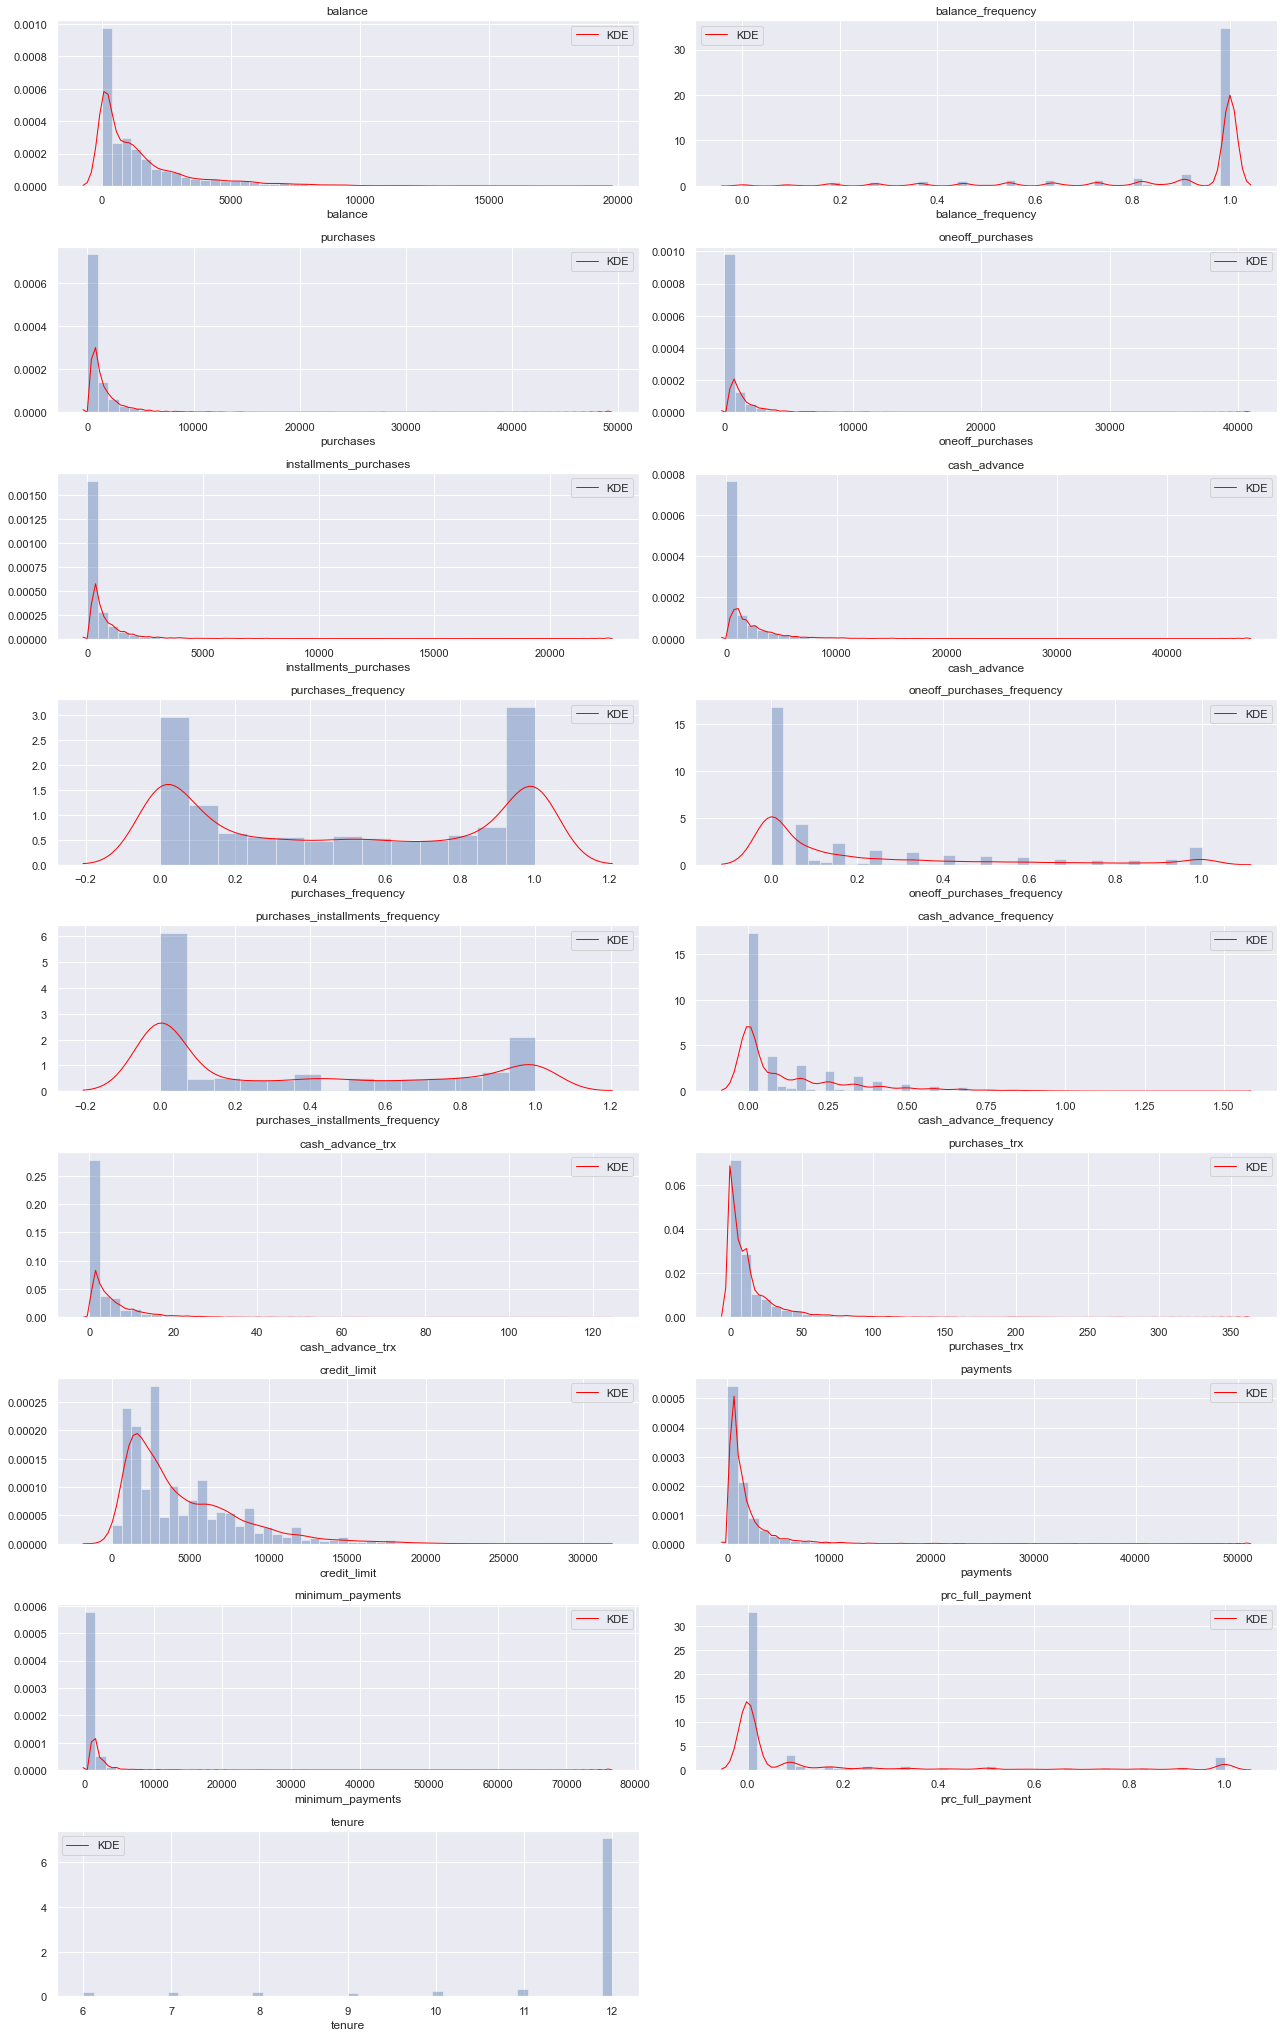

In [19]:
# sets the plot size
plt.figure(figsize=(18, 50))

# plots a distribution for each feature 
for i in range(len(df_cc.columns)):
    plt.subplot(16, 2, i+1)
    sns.distplot(df_cc[df_cc.columns[i]],
                 kde_kws={'color':'red', 'lw':1, 'label':'KDE'})
    plt.title(df_cc.columns[i])

# adjusts the layout    
plt.tight_layout()

#### Key points:

- The balance frequency for most customers is updated frequently.
- For purchases frequency, there are two distinct group of customers.
- Most customers don't do one off purchases or installment purchases frequently.
- Most customers don't do cash in advance.
- Very small number of customers pay their balance in full.
- Most customers are 11+ years tenure.

## 3.3 Bivariate analysis

### 3.3.1 Balance

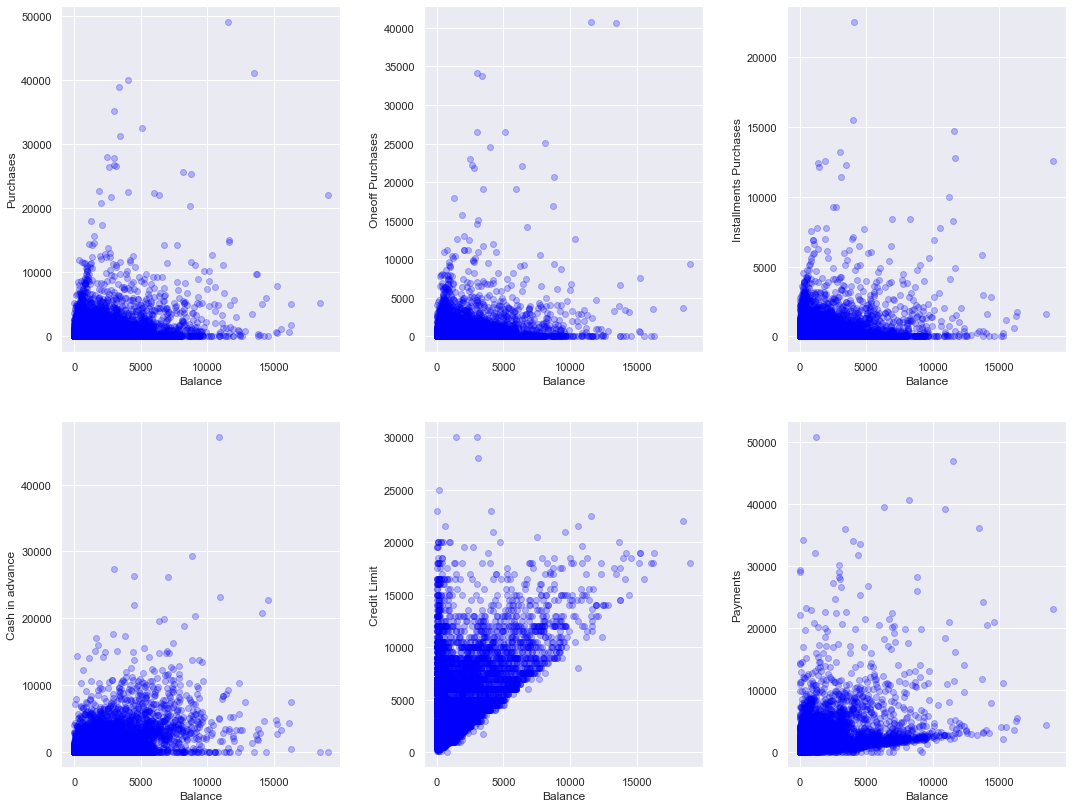

In [20]:
# sets figure size
plt.figure(figsize=(18, 14))

# plots a scatter plot
plt.subplot(2,3,1)
plt.scatter(df_cc['balance'], df_cc['purchases'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Purchases')


# plots a scatter plot
plt.subplot(2,3,2)
plt.scatter(df_cc['balance'], df_cc['oneoff_purchases'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Oneoff Purchases')


# plots a scatter plot
plt.subplot(2,3,3)
plt.scatter(df_cc['balance'], df_cc['installments_purchases'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Installments Purchases')

# plots a scatter plot
plt.subplot(2,3,4)
plt.scatter(df_cc['balance'], df_cc['cash_advance'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Cash in advance')

# plots a scatter plot
plt.subplot(2,3,5)
plt.scatter(df_cc['balance'], df_cc['credit_limit'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Credit Limit')


# plots a scatter plot
plt.subplot(2,3,6)
plt.scatter(df_cc['balance'], df_cc['payments'], color='blue', alpha=0.25)
plt.xlabel('Balance')
plt.ylabel('Payments')

# prevents scientific notation on axis
plt.ticklabel_format(useOffset=False, style='plain')

# adjusts spaces between plots
plt.subplots_adjust(hspace = 0.2)
plt.subplots_adjust(wspace = 0.3)

# displays the plot
plt.show()

As observed, most customers have balance up to 10,000 and:
- Make purchases up to 10,000
- Make one off purchases up to 5,000
- Make installments purchases up to 5,000
- Use cash in advance up to 10,000
- Have credit limit up to 15,000
- Make payments up to 10,000

### 3.3.2 Purchases

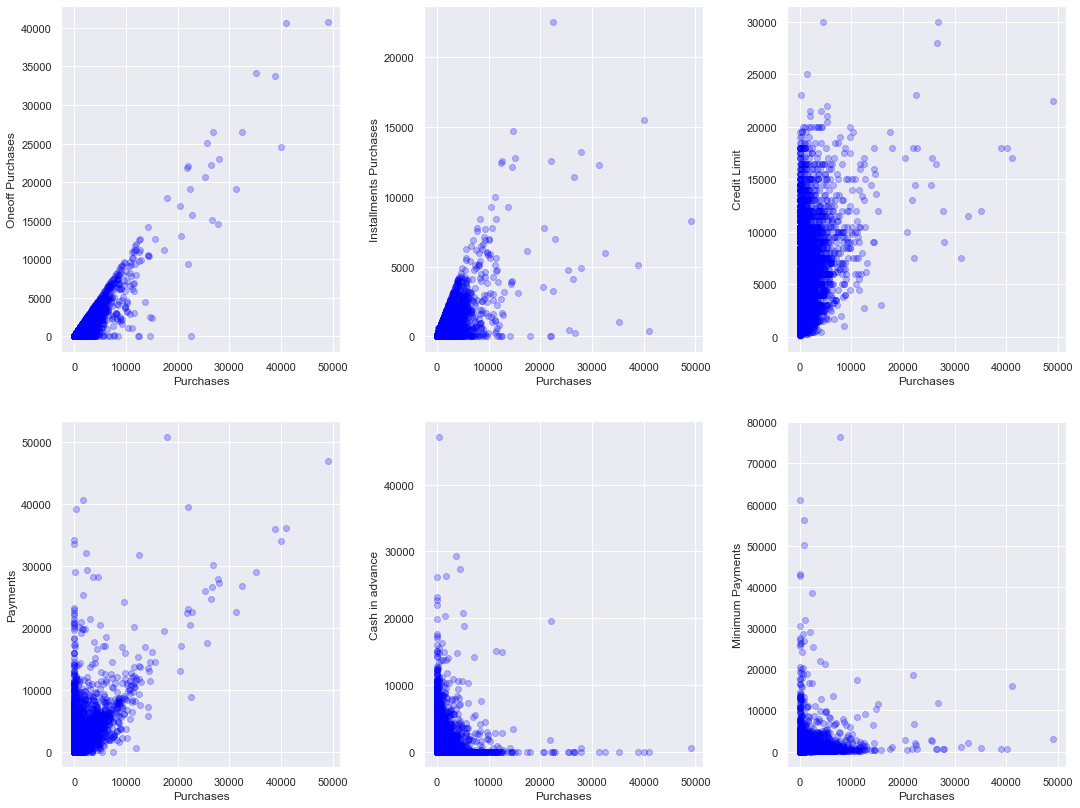

In [21]:
# sets figure size
plt.figure(figsize=(18, 14))

# plots a scatter plot
plt.subplot(2,3,1)
plt.scatter(df_cc['purchases'], df_cc['oneoff_purchases'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Oneoff Purchases')


# plots a scatter plot
plt.subplot(2,3,2)
plt.scatter(df_cc['purchases'], df_cc['installments_purchases'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Installments Purchases')


# plots a scatter plot
plt.subplot(2,3,3)
plt.scatter(df_cc['purchases'], df_cc['credit_limit'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')


# plots a scatter plot
plt.subplot(2,3,4)
plt.scatter(df_cc['purchases'], df_cc['payments'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Payments')


# plots a scatter plot
plt.subplot(2,3,5)
plt.scatter(df_cc['purchases'], df_cc['cash_advance'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Cash in advance')


# plots a scatter plot
plt.subplot(2,3,6)
plt.scatter(df_cc['purchases'], df_cc['minimum_payments'], color='blue', alpha=0.25)
plt.xlabel('Purchases')
plt.ylabel('Minimum Payments')

# prevents scientific notation on axis
plt.ticklabel_format(useOffset=False, style='plain')

# adjusts spaces between plots
plt.subplots_adjust(hspace = 0.2)
plt.subplots_adjust(wspace = 0.3)

# displays the plot
plt.show()

As observed, most customers make purchases up to 10,000 and:
- Make one off purchases up to 10,000
- Make install purchases up to 5,000
- Have all sorts of credit limit up to 20,000
- Make payments up to 20,000
- Use cash in advance up to 10,000
- Make minimum payments up to 10,000

### 3.3.3 Credit Limit

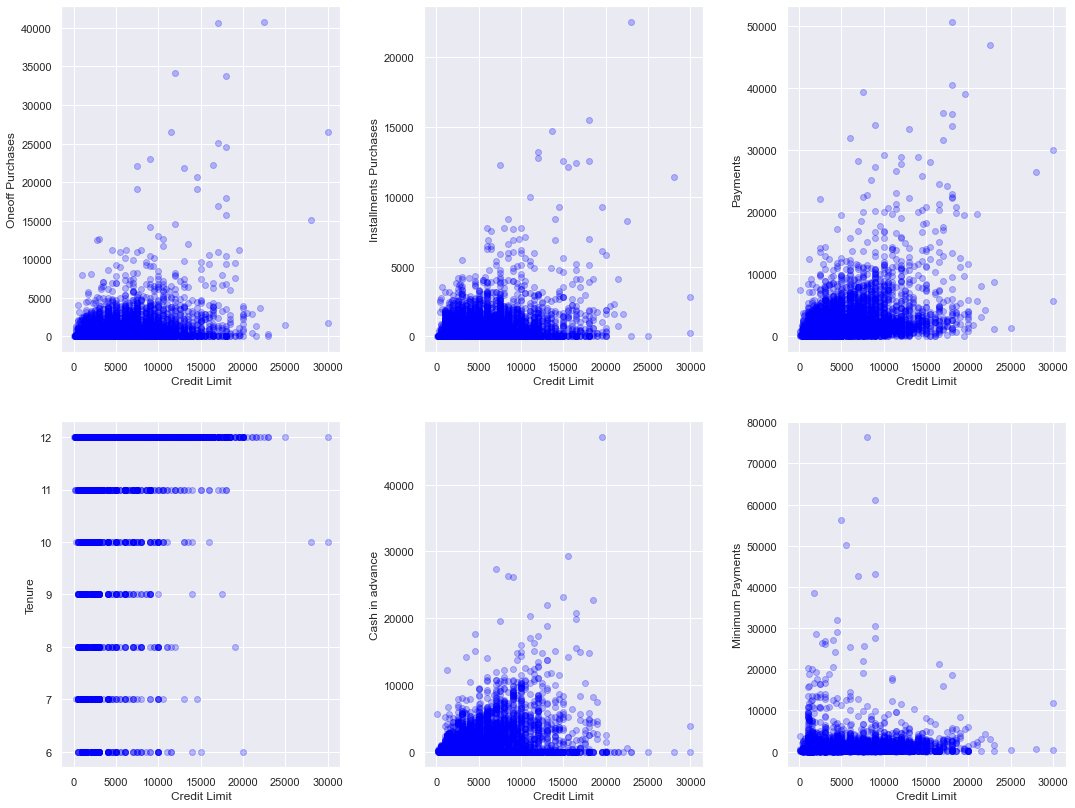

In [22]:
# sets figure size
plt.figure(figsize=(18, 14))

# plots a scatter plot
plt.subplot(2,3,1)
plt.scatter(df_cc['credit_limit'], df_cc['oneoff_purchases'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Oneoff Purchases')


# plots a scatter plot
plt.subplot(2,3,2)
plt.scatter(df_cc['credit_limit'], df_cc['installments_purchases'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Installments Purchases')


# plots a scatter plot
plt.subplot(2,3,3)
plt.scatter(df_cc['credit_limit'], df_cc['payments'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Payments')


# plots a scatter plot
plt.subplot(2,3,4)
plt.scatter(df_cc['credit_limit'], df_cc['tenure'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Tenure')


# plots a scatter plot
plt.subplot(2,3,5)
plt.scatter(df_cc['credit_limit'], df_cc['cash_advance'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Cash in advance')


# plots a scatter plot
plt.subplot(2,3,6)
plt.scatter(df_cc['credit_limit'], df_cc['minimum_payments'], color='blue', alpha=0.25)
plt.xlabel('Credit Limit')
plt.ylabel('Minimum Payments')

# prevents scientific notation on axis
plt.ticklabel_format(useOffset=False, style='plain')

# adjusts spaces between plots
plt.subplots_adjust(hspace = 0.2)
plt.subplots_adjust(wspace = 0.3)

# displays the plot
plt.show()

As observed, most customers have credit limit up to 20,000 and:
- Make one off purchases up to 5,000
- Make installments purchases up to 5,000
- Make payments up to 10,000
- Use cash in advance up to 10,000
- Make minimum payments up to 5,000

## 3.4 Multivariate analysis - Correlations

### 3.4.1 Correlation between numerical attributes

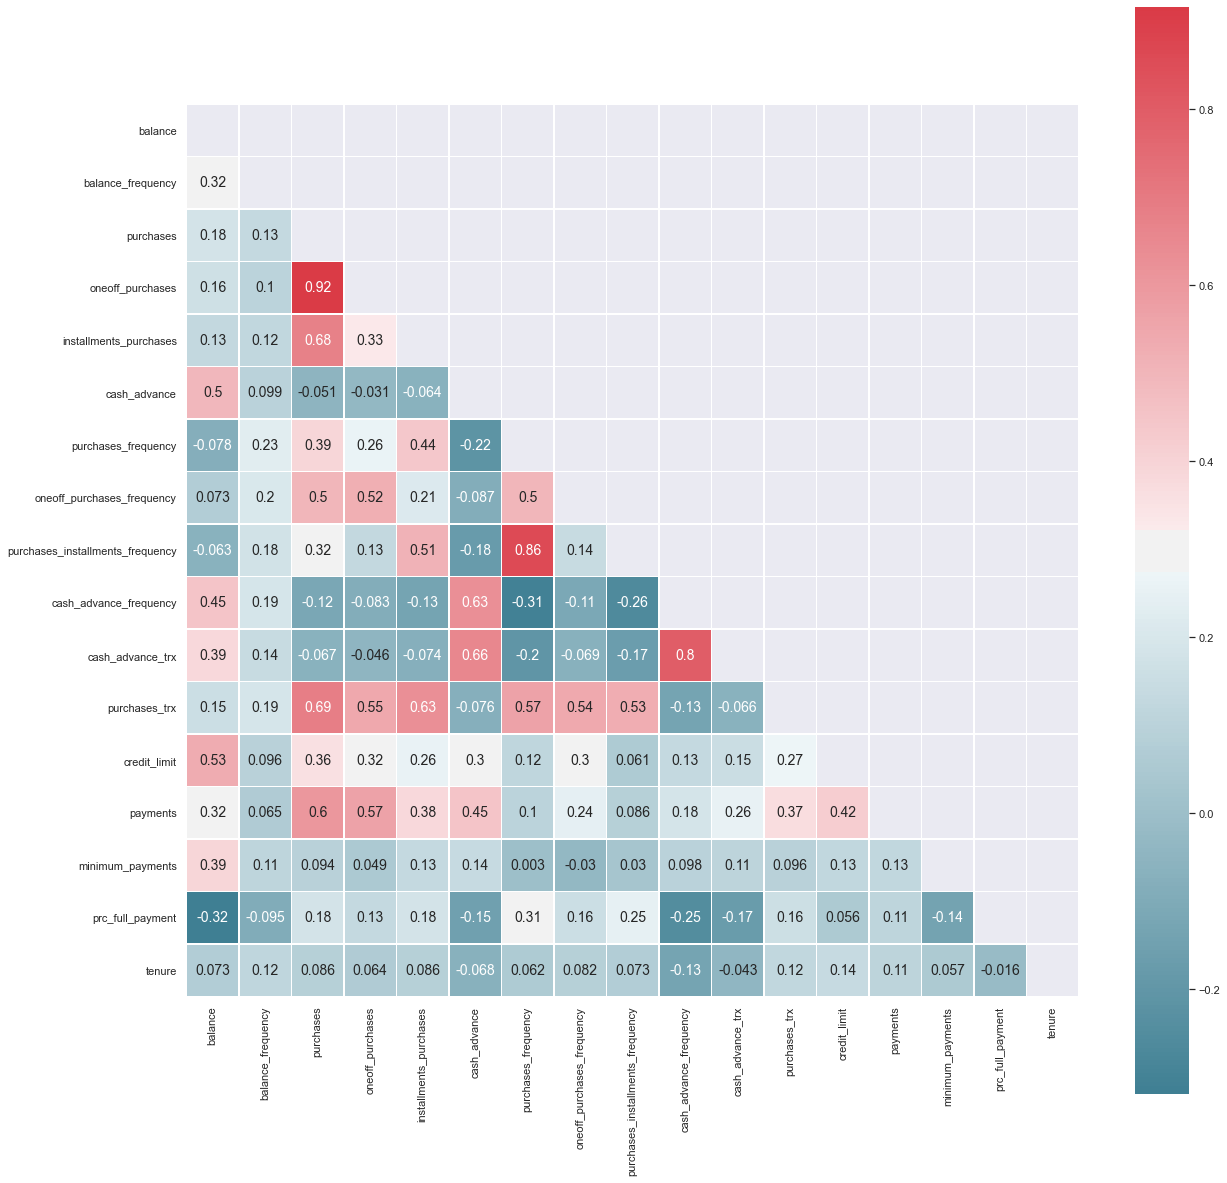

In [23]:
# calculates the correlations
correlation = df_cc.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

#### Very strong correlations:
- One off purchases with Purchases
- Purchases intallments frequency with Purchases frequency
- Cash in advance transactions with Cash in advance frequency
- Purchases with Purchases transactions

#### Medium correlations:
- Balance with Cash in advance
- Balance with Cash in advance frequency
- Balance with Credit limit

#### Relatively medium:
- Payments with Purchases transactions
- Payments with Credit limit

# 4.0 Data preparation

## 4.1 Loading data set

In [24]:
# loads data set
df_cc = pd.read_csv('data/credit_card_clean.csv')

## 4.2 Scaling the data

We need to scale the data because the range of variables vary a lot within them, so we can treat each feature equally when the model ingests them.

In [25]:
# normalizes data
df_cc_normalized = Normalizer().fit_transform(df_cc.values)
df_cc_normalized

array([[3.93529208e-02, 7.87219116e-04, 9.17897286e-02, ...,
        1.34230246e-01, 0.00000000e+00, 1.15458778e-02],
       [2.93875725e-01, 8.34231054e-05, 0.00000000e+00, ...,
        9.84037362e-02, 2.03922922e-05, 1.10118488e-03],
       [3.10797802e-01, 1.24560826e-04, 9.63066935e-02, ...,
        7.81351110e-02, 0.00000000e+00, 1.49472991e-03],
       ...,
       [2.27729209e-02, 8.11047126e-04, 1.40538302e-01, ...,
        8.02142497e-02, 2.43314235e-04, 5.83954164e-03],
       [2.65239400e-02, 1.64244246e-03, 0.00000000e+00, ...,
        1.09890537e-01, 4.92732934e-04, 1.18255904e-02],
       [1.86405379e-01, 3.33425336e-04, 5.46775599e-01, ...,
        4.41566401e-02, 0.00000000e+00, 3.00082652e-03]])

## 4.5 Checkpoint

In [26]:
# saves the data set state
pd.DataFrame(df_cc_normalized).to_csv('data/credit_card_prep.csv', index=False)

# 5.0 Machine Learning Modeling

## 5.1 Loading data set

In [27]:
df_cc_normalized = pd.read_csv('data/credit_card_prep.csv')

## 5.2 Finding the right number of clusters for K-Means

In [28]:
# accumulator for scores
wcss_scores = []

# sets the number of turns
range_values = range(1,20)

for value in range_values:
    # forces kmeans to run 10 times and return the same value
    kmeans = KMeans(n_clusters=value, n_init=10, max_iter=300, random_state=SEED)
    
    # predicts the labels
    kmeans.fit_predict(df_cc_normalized)
    
    # stores the current inertia
    wcss_scores.append(kmeans.inertia_)

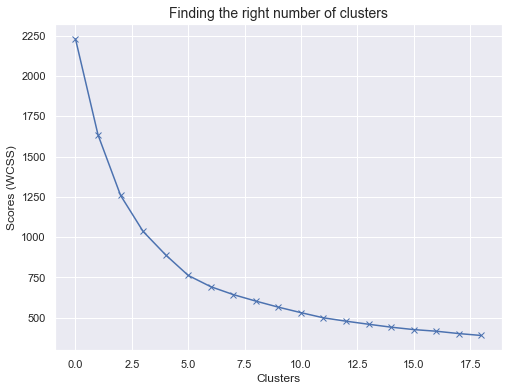

In [29]:
# sets the figure size
plt.figure(figsize=(8,6))

# plots the wcss scores
plt.plot(wcss_scores, 'bx-')

# sets the plot features
plt.title('Finding the right number of clusters', fontsize=14)
plt.xlabel('Clusters')
plt.ylabel('Scores (WCSS)')

# displays the plot
plt.show()

Applying the elbow method, it seems that `5` clusters is a good number.

# 6.0 Evaluating the algorithm - metrics

## 6.1 Silhouette, Davies Bouldin and Calinski Harabasz

We have three values to interpret with different metrics, but how do we do that?

- In the **Silhouette score**, it is bounded between -1 and 1, so if the cluster gets a positive value this is a good sign.  Closer to -1 suggests incorrect clustering, while **closer to +1 shows that each cluster is very dense**.

- In the case of the **Davies Bouldin socre**, the **closer to 0 the value, the better**. 

- For **Calinski Harabasz score**, unlike other metrics we have seen, this score is not bounded. The value should be as high as possible, that is, **a high CH score is desirable**. 

It is difficult to make any assessment if we only consider the raw value, at which point we present the relative assessment.

We compare the value of the metrics based on different settings of our algorithm. The idea is to **adjust the parameters** of the algorithm to obtain the best results.

In [30]:
# creates an accumulator for each metric
s_scores = []
db_scores = []
calinski_scores = []

# sets the number of turns
range_values = range(3,20)

for value in range_values:
    # calculates KMeans and get the scores
    s, db, cal = get_clustering_scores(value, df_cc_normalized)
    
    # stores the metrics
    s_scores.append(s)
    db_scores.append(db)
    calinski_scores.append(cal)

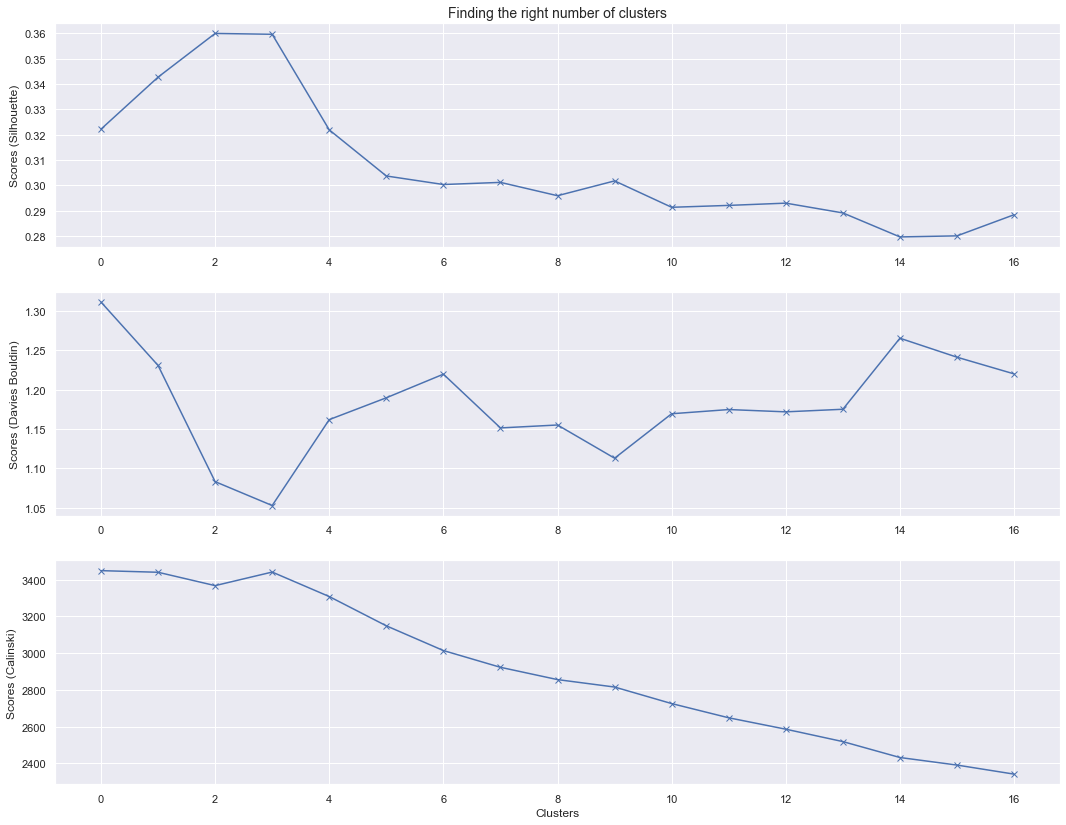

In [31]:
# sets the figure size
plt.figure(figsize=(18,14))

# plots the wcss scores
plt.subplot(3,1,1)
plt.plot(s_scores, 'bx-')

# sets the plot features
plt.title('Finding the right number of clusters', fontsize=14)
plt.ylabel('Scores (Silhouette)')


# plots the wcss scores
plt.subplot(3,1,2)
plt.plot(db_scores, 'bx-')

# sets the plot features
plt.ylabel('Scores (Davies Bouldin)')


# plots the wcss scores
plt.subplot(3,1,3)
plt.plot(calinski_scores, 'bx-')

# sets the plot features
plt.xlabel('Clusters')
plt.ylabel('Scores (Calinski)')

# displays the plot
plt.show()

As observed, **3 clusters** seems to be a good number, since the scores are better for this number.

## 6.2 Clusters stability

Now that we chose the right number of clusters, we need to **check if the metrics keep their stability** when evaluating different sets of data.

In [32]:
# sets the number os splits for the data
N_SETS = 20

In [33]:
# sets the number of clusters
N_CLUSTERS = 3

# calculates the standard deviation for each score
calculate_clusters_stability(N_SETS, N_CLUSTERS, df_cc_normalized)

Standard deviation for 3 clusters:
Silouette: 0.021157332148887608
Davies Bouldin: 0.058698935089418446
Calinski Harabasz: 13.792228766086891



In [34]:
# sets the number of clusters
N_CLUSTERS = 5

# calculates the standard deviation for each score
calculate_clusters_stability(N_SETS, N_CLUSTERS, df_cc_normalized)

Standard deviation for 5 clusters:
Silouette: 0.01923642856027048
Davies Bouldin: 0.0488273010559168
Calinski Harabasz: 9.686848984700111



In [35]:
# sets the number of clusters
N_CLUSTERS = 7

# calculates the standard deviation for each score
calculate_clusters_stability(N_SETS, N_CLUSTERS, df_cc_normalized)

Standard deviation for 7 clusters:
Silouette: 0.028959943381941102
Davies Bouldin: 0.05893298010293318
Calinski Harabasz: 10.222162933869512



As observed, although the scores are better for 3 clusters, **the trade-off of stability and scores** is better when we have **5 clusters**. So we're going to move forward with 5 clusters.

# 7.0 Updating the Machine Learning

We've discovered that 5 clusters is the right number. So, we're going to use this number to build our clusters and start getting some insights from them.

In [36]:
# instantiates cluster algorithm
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=SEED)

# finds the clusters
labels = kmeans.fit_predict(df_cc_normalized)

In [37]:
# sets the number of clusters
N_CLUSTERS = 5

# calculates KMeans and get the scores
s, db, cal = get_clustering_scores(N_CLUSTERS, df_cc_normalized)
print(f'Silouette: {s}\nDavies Bouldin: {db}\nCalinski Harabasz: {cal}\n')

Silouette: 0.35990587093703263
Davies Bouldin: 1.0830097737200426
Calinski Harabasz: 3367.802055609408



# 8.0 Visualizing the clusters

## 8.1 K-Means and scatter plot

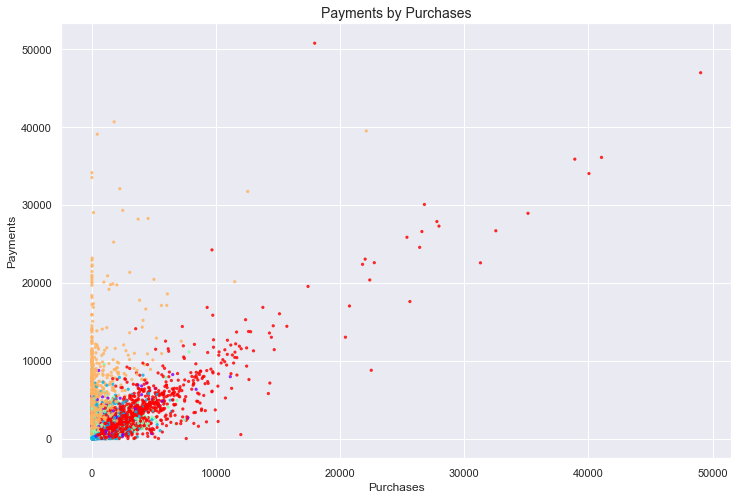

In [38]:
# sets the plot size
plt.figure(figsize=(12,8))

# plots a scatter plot to view the clusters
plt.scatter(x=df_cc['purchases'], y=df_cc['payments'], c=labels, s=5, cmap='rainbow', alpha=0.75)

# sets the plot features
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.title("Payments by Purchases", fontsize=14)

# displays the plot
plt.show()

In [39]:
# creates a column with respective labels
df_cc['cluster'] = labels

In [40]:
# plots a 3D plot for better cluster viz
fig = px.scatter_3d(df_cc, x='purchases', y='payments', z='credit_limit',
              color='cluster', opacity=0.5)

# displays the plot
fig.show()

## 8.2 T-SNE and scatter plot

In [41]:
# instantiates TSNE
model = TSNE(n_components=2, perplexity=45, random_state=SEED, n_jobs=-1)

# fits TSNE to data
df_embedded = model.fit_transform(df_cc_normalized)

# joins transformation with labels
df_tsne = pd.concat([pd.DataFrame(df_embedded), pd.DataFrame(labels)], axis=1)

# renames columns
df_tsne.columns = ['t1','t2','labels']

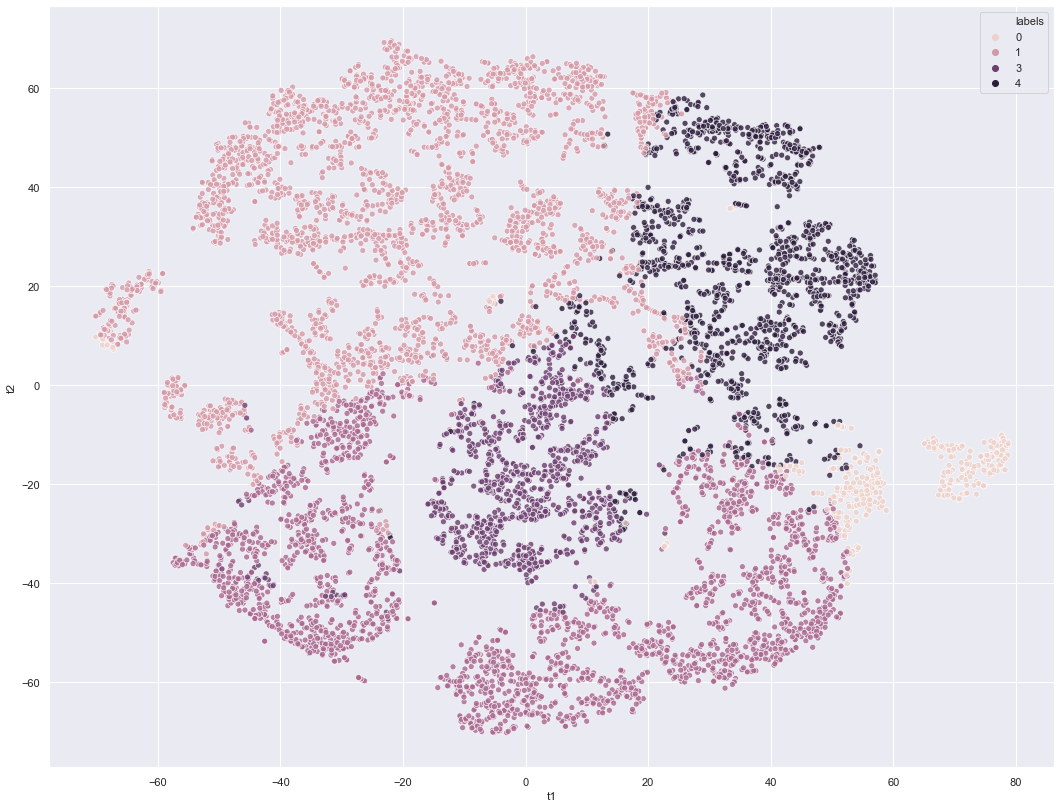

In [42]:
# sets the figure size
plt.figure(figsize=(18,14))

# plots a scatter plot
sns.scatterplot(data=df_tsne, x='t1', y='t2', hue='labels', alpha=0.8)

# displays the legend
plt.legend()

# displays the plot
plt.show()

In [43]:
# instantiates TSNE
model = TSNE(n_components=3, perplexity=45, random_state=SEED, n_jobs=-1)

# fits TSNE to data
df_embedded = model.fit_transform(df_cc_normalized)

# joins transformation with labels
df_tsne = pd.concat([pd.DataFrame(df_embedded), pd.DataFrame(labels)], axis=1)

# renames columns
df_tsne.columns = ['t1','t2', 't3', 'labels']

In [44]:
# plots a 3D plot for better cluster viz
fig = px.scatter_3d(df_tsne, x='t1', y='t2', z='t3',
              color='labels', opacity=0.5)

# displays the plot
fig.show()

# 9.0 Understanding the attributes values in the cluster

## 9.1 Analyzing the values

Now we have the value of each of the 17 attributes of the 5 clusters. We'll observe the variance of the centroids for a given attribute, that is, we'll collect an attribute and check how it behaves in different clusters.

As we'll analyze the variance, we'll look for an attribute that the values differ between the clusters, as this will increase the chance of observing the particularities of each group.

Those attributes that have the greatest variance will be the ones used for our analysis.

In [45]:
# gets the centroids
centroids = kmeans.cluster_centers_

# gets the max number of attributes
max_att = len(centroids[0])
feature_name = []
centroid_var = []

# calculates the variance for each feature centroid
for i in range(max_att):
    feature_name.append(df_cc.columns.values[i])
    centroid_var.append(centroids[:, i].var())

# creates a DataFrame for better visualization
df_feat_cent_vars = pd.DataFrame({'feature_name': feature_name, 'centroid_var':centroid_var})
df_feat_cent_vars.sort_values(by='centroid_var', ascending=False)

feature_name  centroid_var
14                  minimum_payments      0.054102
12                      credit_limit      0.034250
13                          payments      0.028109
5                       cash_advance      0.022608
0                            balance      0.021668
2                          purchases      0.019685
3                   oneoff_purchases      0.007758
4             installments_purchases      0.003537
11                     purchases_trx      0.000003
10                  cash_advance_trx      0.000000
16                            tenure      0.000000
6                purchases_frequency      0.000000
8   purchases_installments_frequency      0.000000
15                  prc_full_payment      0.000000
7         oneoff_purchases_frequency      0.000000
9             cash_advance_frequency      0.000000
1                  balance_frequency      0.000000

As observed, the features that we can use are:

- `minimum_payments`
- `credit_limit`
- `payments`
- `cash_advance`
- `balance`
- `purchases`

## 9.2 Filtering the values

In [46]:
# get the values for each col grouped by cluster
description = df_cc.groupby('cluster')[['balance', 'purchases', 'cash_advance','credit_limit',
                                        'payments', 'minimum_payments']]


# calculates the number of customers in each cluster
n_customers = description.size()

# calculates the mean for each value in each cluster
description = description.mean()

description['n_customers'] = n_customers

# displays the summary
description

balance    purchases  cash_advance  credit_limit     payments  \
cluster                                                                      
0       1,839.038316   803.802546    391.873126  2,122.916667 1,248.898910   
1         445.842750   633.215972    139.459447  5,163.512059   821.465714   
2       3,033.598445   387.435532  1,634.636886  4,492.478375   967.936790   
3       1,799.106589   480.988753  3,271.000826  3,990.112755 4,715.054918   
4       1,147.080081 3,280.005372    179.673485  4,100.267723 3,040.651881   

         minimum_payments  n_customers  
cluster                                 
0            5,760.595113          432  
1              261.207247         3252  
2            1,037.253393         2659  
3              741.269239         1075  
4              549.415335         1532

# 10.0 Business performance¶

## 10.1 Profiling the clusters

In [47]:
description

balance    purchases  cash_advance  credit_limit     payments  \
cluster                                                                      
0       1,839.038316   803.802546    391.873126  2,122.916667 1,248.898910   
1         445.842750   633.215972    139.459447  5,163.512059   821.465714   
2       3,033.598445   387.435532  1,634.636886  4,492.478375   967.936790   
3       1,799.106589   480.988753  3,271.000826  3,990.112755 4,715.054918   
4       1,147.080081 3,280.005372    179.673485  4,100.267723 3,040.651881   

         minimum_payments  n_customers  
cluster                                 
0            5,760.595113          432  
1              261.207247         3252  
2            1,037.253393         2659  
3              741.269239         1075  
4              549.415335         1532

In [48]:
# percentage of credit card invoice that a customer paid
df_cc.groupby('cluster')['prc_full_payment'].describe()

count     mean      std      min      25%      50%      75%  \
cluster                                                                      
0         432.000000 0.018379 0.088756 0.000000 0.000000 0.000000 0.000000   
1       3,252.000000 0.249084 0.347478 0.000000 0.000000 0.000000 0.454545   
2       2,659.000000 0.001792 0.023216 0.000000 0.000000 0.000000 0.000000   
3       1,075.000000 0.117289 0.186635 0.000000 0.000000 0.083333 0.142857   
4       1,532.000000 0.278677 0.367401 0.000000 0.000000 0.083333 0.547980   

             max  
cluster           
0       1.000000  
1       1.000000  
2       0.600000  
3       1.000000  
4       1.000000

### CLUSTER 0: 
- Considerably good value for balance.
- **Customers with lowest credit limit**.
- Greater value for minimum payments.
- **Customers that when they have to pay the minimum, they pay.**
- Fewer customers.


### CLUSTER 1: 
- **Customers who spend little**.
- Customers with the lowest expenses. 
- **Lowest value for cash in advance**.
- Customers with higher credit limit.
- **Good payers**.
- Greater number of customers.


### CLUSTER 2:
- **Highest value for balance**. 
- Lowest value for purchases. 
- Considerable value for cash in advance. 
- **Customers who spend more and with a focus on cash in advance**. 
- **Worst payers**.
- Good amount of customers.


### CLUSTER 3:
- **Customers who spend a lot on cash in advance**.
- Customers with relatively high credit limit.
- Customers with highest value for payments.
- **Customers who use more money than credit cards to make payments**.


### CLUSTER 4: 
- Greater value in purchases with great difference from the others. 
- **Customers who spend a lot on purchases**. 
- Use little cash in advance.
- Considerably high value for payments.
- **Best payers**.

## 10.2 Business Marketing Strategy

One idea is to apply a business strategy to one of the groups with the aim of increasing the company profit. 

### Cluster 1
The most suitable group for this would be Cluster 1, after all it has the **largest number of customers**, they are good payers, good credit limit, but they spend little. Our idea is to engage this group to use their credit card more.

We want these customers to **spend more** to increase the company profit. Suppose the strategy is to partner with a rewards company that provides benefits to the customer who uses the credit the most.

To check if our strategy was effective and use the right group, we'll do the so-called AB test. We'll divide Cluster 1 customers into two groups: the control group and the test group.

The **control group** will remain unchanged, that is, there will be no rewards program. The **test group**, in a defined period, will participate in the rewards program.

At the end of the period, we'll check if the people who participated in the rewards program spent more with the card or not. So we'll have a reliable result, with customers with similar characteristics.

### Cluster 4
Another interesting group to increase profits is cluster 4, after all they **spend a lot on purchases** and are the **best payers**. They don't have a high credit limit, but one way to further encourage credit card use is to **gradually increase** the limit for this group.

### Cluster 2
For the group with the **worst payers**, we would have to structure another type of strategy. As they focus on cash in advance, we could **launch a campaign** to encourage these customers to pay their bills in our bank using cash and in exchange they would be eligible to participate in a rewards program.